### KNN is the k-Nearest neighbour
key 1. The choice of distance measurement <br>
key 2. The choice of K <br>
key 3. The choice of voting rule <br>

#### 1.L-p distance measurement

In [18]:
import math
def distance(x, y, p=2):
    # format check
    if len(x) == len(y) and len(x) > 1:
        d = 0.0
        for i in range(len(x)):
            d += math.pow(abs(x[i]-y[i]), p)
        return math.pow(d, 1/p)
    # format error
    else:
        return -1

In [19]:
# Test
distance([2], [4,6], 1)

-1

#### 2.KNN model class

In [38]:
import numpy as np
from collections import Counter  # for counting
class KNN_Model():
    def __init__(self, x, y, k=3, p=2):
        self.k = k  # the number of neighbour
        self.p = p  # the value of p in L-p distance
        self.x = x
        self.y = y
    
    def predict(self, x_main):
        # find the k nearest neighbour
        distance_list = []
        
        # 1.calculate the distance
        for i in range(self.k):
            dist = np.linalg.norm(x_main-self.x[i], ord = self.p)
            distance_list.append((dist, self.y[i]))
        
        # 2.find the smallest distance with linear search
        # NOTICE the part can be optimazed by kd-tree
        
        for i in range(self.k, len(self.x)):
            # get the index of largest distance
            max_index = distance_list.index(max(distance_list, key = lambda x: x[0]))
            dist = np.linalg.norm(x_main-self.x[i], ord = self.p)
            # if the distance is smaller than the largest, then update it with smaller one
            if dist < distance_list[max_index][0]:
                distance_list[max_index] = (dist, self.y[i])
        
        # get the k nearest distance instances
        knn = [k[-1] for k in distance_list]
        count_dict = Counter(knn)
        print(count_dict)
        # sort the count_dict to get the most vote
        most = sorted(count_dict, key = lambda x : x)[-1]
        print(most)
        return most
    
    # calculate acccuracy (TP+TN) / (TP+FP+TN+FN)
    def score(self, x_train, y_train):
        tp_tn = 0
        for index in range(len(x_train)):
                x = x_train[index]
                y = y_train[index]
                # negtive
                if self.predict(x)==y:
                    # count TP+TN
                    tp_tn += 1
        print('tp_tn : {} / {}'.format(tp_tn, len(x_train)))
        return tp_tn / len(x_train)

#### Test with Iris dataset

In [58]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
# create dataframe from iris feature set
df = pd.DataFrame(iris.data)
# set columns label to iris target set
df['label'] = iris.target
# set columns 0,1,2,3 to real column meaning
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
data = np.array(df.iloc[:100, [0, 1, -1]])
# split into feature and label 
x, y = data[:,:-1], data[:, -1]

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
print('train {},{} test {},{}'.format(x_train.shape[0], x_train.shape[1], x_test.shape[0], x_test.shape[1]))

train 80,2 test 20,2


#### create the model and predict, outputing the score

In [62]:
model = KNN_Model(x_train, y_train, k=3)

In [63]:
model.score(x_test, y_test)

Counter({0.0: 3})
0.0
Counter({0.0: 3})
0.0
Counter({1.0: 3})
1.0
Counter({0.0: 3})
0.0
Counter({1.0: 3})
1.0
Counter({0.0: 3})
0.0
Counter({0.0: 3})
0.0
Counter({0.0: 3})
0.0
Counter({0.0: 3})
0.0
Counter({1.0: 3})
1.0
Counter({0.0: 3})
0.0
Counter({1.0: 3})
1.0
Counter({0.0: 3})
0.0
Counter({0.0: 3})
0.0
Counter({1.0: 3})
1.0
Counter({0.0: 3})
0.0
Counter({0.0: 3})
0.0
Counter({1.0: 3})
1.0
Counter({1.0: 3})
1.0
Counter({1.0: 3})
1.0
tp_tn : 20 / 20


1.0

#### Test the point and plot

Counter({1.0: 3})
1.0
Test Point: 1.0


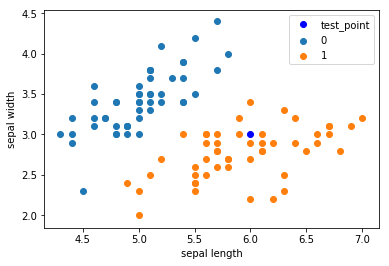

In [64]:
# plot the test point
test_point = [6.0, 3.0]
print('Test Point: {}'.format(model.predict(test_point)))
import matplotlib.pyplot as plt
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### 3. Kd Tree

In [106]:
# define the class : node of kd tree
class KdNode:
    def __init__(self, vector, dimention, left, right):
        self.vector = vector  # the value of node
        self.dimention = dimention  # the value of devide dimention
        self.left = left  # left node link
        self.right = right  # right node link

# define the class : kd tree
class KdTree:
    def __init__(self, data):
        # get the dimention
        k = len(data[0])
        
        def CreateNode(split, data_set):
            # if the data is none, return none
            if not data_set:   
                return None
            # choose the median
            # NOTICE the index is 2, means the third
            data_set.sort(key=lambda x: x[split])  # sort the data in the dimention
            split_pos = len(data_set) // 2  # // is to get round number, 5//2 = 2
            median = data_set[split_pos]                 
            split_next = (split + 1) % k  
            
            # start from 0 dim
            return KdNode(median, split, 
                          CreateNode(split_next, data_set[:split_pos]),     
                          CreateNode(split_next, data_set[split_pos + 1:]))   # NOTICE +1
        # start from 0 dim                        
        self.root = CreateNode(0, data)         

# preorder the kd tree
def preorder(root):
    print(root.vector)
    if root.left:
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [107]:
from collections import namedtuple
from math import sqrt

In [124]:
# define the result namedtuple
result = namedtuple("Result_tuple", "nearest_node  nearest_dist  nodes_visited")

# search in kd tree
def find_nearest(tree, point):
    
    # k is the dimention of the target point
    k = len(point)
    
    # recursion search function
    def travel(kd_node, target, max_dist):
        
        # if node is none, return inf distance
        if not kd_node:
            return result([0]*k, float('inf'), 0)

        #  since node is not none, visited this node
        nodes_visited = 1

        # get dimention and vector of kd_node
        dim = kd_node.dimention
        pivot = kd_node.vector
        
        # check which is the nearest and which is further part
        if target[dim] < pivot[dim]:
            nearest_node = kd_node.left
            next_node = kd_node.right
        else:
            nearest_node = kd_node.right
            next_node = kd_node.left

        # recurse to get the node in temporary node
        templ = travel(nearest_node, target, max_dist)

        # set nearest and dist
        nearest = templ.nearest_node
        dist = templ.nearest_dist
        
        # update the number of visited nodes
        nodes_visited += templ.nodes_visited

        # update max_dist
        if dist < max_dist:
            max_dist = dist
        
        # check if temp is in target part in cycle
        temp_dist = abs(pivot[dim] - target[dim])
        
        # check the circle and not touched, then return 
        if max_dist < temp_dist:
            return result(nearest, dist, nodes_visited)
        
        # cal l2 distance
        temp_dist = sqrt(sum((p1-p2)**2 for p1, p2 in zip(pivot, target)))
        if temp_dist < dist:
            nearest = pivot
            dist = temp_dist
            max_dist = dist
        
        # recurse to get the node in temporary node
        templ = travel(next_node, target, max_dist)
        
        nodes_visited += templ.nodes_visited
        
        if templ.nearest_dist < dist:
            nearest = templ.nearest_node
            dist = templ.nearest_dist
            
        return result(nearest, dist, nodes_visited)

    return travel(tree.root, point, float('inf'))


In [113]:
data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kd = KdTree(data)
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [118]:
from time import clock
from random import random

# 产生一个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]
 
# 产生n个k维随机向量 
def random_points(k, n):
    return [random_point(k) for _ in range(n)] 

In [125]:
ret = find_nearest(kd, [3,4.5])
print (ret)

Result_tuple(nearest_node=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


In [126]:
N = 400000
t0 = clock()
kd2 = KdTree(random_points(3, N))            # 构建包含四十万个3维空间样本点的kd树
ret2 = find_nearest(kd2, [0.1,0.5,0.8])      # 四十万个样本点中寻找离目标最近的点
t1 = clock()
print ("time: ",t1-t0, "s")
print (ret2)

time:  7.5687289999999905 s
Result_tuple(nearest_node=[0.09642362335108356, 0.4996879465980524, 0.800727333562886], nearest_dist=0.0036629034074463626, nodes_visited=39)
